## Predict The Flight Ticket Price Hackathon
### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticke

In [1]:
# see the value of multiple satement at once
#output fro all comands in pyhton jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [4]:
train_df = pd.read_excel('Data_Train.xlsx')

C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [5]:
test_df = pd.read_excel('Test_set.xlsx')

C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\CHALLA\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [6]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [7]:
train_df.shape

(10683, 11)

In [8]:
test_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [9]:
test_df.shape

(2671, 10)

In [10]:
big_df = train_df.append(test_df,sort=False)

In [11]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [12]:
big_df.shape

(13354, 11)

In [13]:
big_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [15]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Feature Engineering

In [16]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

In [17]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [18]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [19]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Month']=big_df['Month'].astype(int)
big_df['Year']=big_df['Year'].astype(int)

In [20]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [21]:
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [22]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [23]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [24]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [25]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [26]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [27]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year


In [28]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [29]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [30]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [31]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [32]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [33]:
big_df['Stop']=big_df['Stop'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [34]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [35]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

In [36]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [37]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [38]:
big_df['Departure_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]

In [39]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'],axis=1)

In [40]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [41]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [42]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [43]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [44]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [45]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [46]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [47]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [48]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [50]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


### Feature Selection

In [51]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
train=big_df[0:10683]
test=big_df[10683:]

In [53]:
train

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4107.0,9,4,2019,0,22,25,19,55,2,5,24,12,4
10679,1,3,0,8,4145.0,27,4,2019,0,23,20,20,45,2,5,24,12,4
10680,4,0,2,8,7229.0,27,4,2019,0,11,20,8,20,0,13,24,12,4
10681,10,0,5,8,12648.0,1,3,2019,0,14,10,11,30,0,13,24,12,4


In [54]:
test

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,8,9087.064121,6,6,2019,1,4,25,17,30,3,7,6,12,4
1,3,3,0,8,9087.064121,12,5,2019,1,10,20,6,20,2,33,3,12,4
2,4,2,1,5,9087.064121,21,5,2019,1,19,0,19,15,3,7,6,12,4
3,6,2,1,8,9087.064121,21,5,2019,1,21,0,8,0,3,7,6,12,4
4,0,0,2,8,9087.064121,24,6,2019,0,2,45,23,55,0,13,24,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,2019,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,2019,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,2019,1,19,15,4,0,3,7,6,12,4


In [55]:
x=train.drop(['Price'],axis=1)
y=train[['Price']]

In [56]:
x

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,9,4,2019,0,22,25,19,55,2,5,24,12,4
10679,1,3,0,8,27,4,2019,0,23,20,20,45,2,5,24,12,4
10680,4,0,2,8,27,4,2019,0,11,20,8,20,0,13,24,12,4
10681,10,0,5,8,1,3,2019,0,14,10,11,30,0,13,24,12,4


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((7478, 17), (7478, 1), (3205, 17), (3205, 1))

In [59]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [60]:
model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [61]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [62]:
selected_features=X_train.columns[(model.get_support())]

In [63]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [64]:
X_train.shape,X_test.shape

((7478, 17), (3205, 17))

In [65]:
X_train=X_train.drop(['Year'],axis=1)

In [66]:
X_test=X_test.drop(['Year'],axis=1)

In [67]:
X_train.shape,X_test.shape

((7478, 16), (3205, 16))

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [69]:
model = rf.fit(X_train,Y_train)

C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [70]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [72]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((7478, 16), (7478, 1), (3205, 16), (3205, 1))

In [73]:
from sklearn import metrics

In [74]:
print('TRAIN:')
print('RSquared:',r2_score(Y_train,predict_train))
print('MAE:',mean_absolute_error(Y_train,predict_train))
print('MSE:',mean_squared_error(Y_train,predict_train))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train,predict_train)))

TRAIN:
RSquared: 0.9826390396154913
MAE: 256.8946886535762
MSE: 376621.1653324308
Root Mean Squared Error: 613.6946841324526


In [75]:
print('TEST:')
print('RSquared:',r2_score(Y_test,predict_test))
print('MAE:',mean_absolute_error(Y_test,predict_test))
print('MSE:',mean_squared_error(Y_test,predict_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,predict_test)))

TEST:
RSquared: 0.8705771363013908
MAE: 670.072634738515
MSE: 2621647.83771986
Root Mean Squared Error: 1619.1503443843194


#### RandomForestRegressor

In [76]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [79]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [80]:
model_rf= rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=   7.4s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.8s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.4s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=  10.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=  10.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   6.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.7s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.8s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   7.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   7.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   7.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.0s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.0s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   3.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   3.1s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   8.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   7.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   9.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   9.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  11.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   9.3s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=   9.6s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.3s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=   9.2s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.8s
[CV] n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=  11.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   5.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   5.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   5.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.1s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   9.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=  10.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=  11.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=  10.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=  11.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=  20.5s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=  19.5s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=  20.8s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=  19.8s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=  21.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   3.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   3.3s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   2.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   7.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   7.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   7.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=  17.7s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=  18.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=  18.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=  18.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=  16.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=  14.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=  14.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=  17.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=  15.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=  15.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   4.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   5.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   4.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.6s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.6s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   3.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  14.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  12.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  11.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  11.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total=  12.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.6s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25, total=   2.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.1s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 21.2min finished
C:\Users\CHALLA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [81]:
pred_train_cv=model_rf.predict(X_train)
pred_test_cv=model_rf.predict(X_test)

In [85]:
print('TRAIN:')
print('RSquared:',r2_score(Y_train,pred_train_cv))
print('MAE:',mean_absolute_error(Y_train,pred_train_cv))
print('MSE:',mean_squared_error(Y_train,pred_train_cv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train,pred_train_cv)))

TRAIN:
RSquared: 0.9668417610804065
MAE: 363.43518367466993
MSE: 719320.4929729379
Root Mean Squared Error: 848.127639552525


In [86]:
print('TEST:')
print('RSquared:',r2_score(Y_test,pred_test_cv))
print('MAE:',mean_absolute_error(Y_test,pred_test_cv))
print('MSE:',mean_squared_error(Y_test,pred_test_cv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test,pred_test_cv)))

TEST:
RSquared: 0.870400725060545
MAE: 681.9309287811291
MSE: 2625221.3032953837
Root Mean Squared Error: 1620.2534688422622


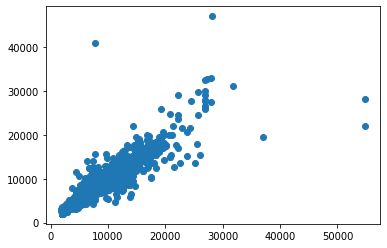

In [84]:
plt.scatter(Y_test,pred_test_cv)